Epoch 1: ELBO=-62.21
Epoch 2: ELBO=-62.18
Epoch 3: ELBO=-62.12
Epoch 4: ELBO=-62.09
Epoch 5: ELBO=-62.08
Epoch 6: ELBO=-62.05
Epoch 7: ELBO=-62.00
Epoch 8: ELBO=-61.97
Epoch 9: ELBO=-61.92
Epoch 10: ELBO=-61.90
Epoch 11: ELBO=-61.83
Epoch 12: ELBO=-61.86
Epoch 13: ELBO=-61.77
Epoch 14: ELBO=-61.75
Epoch 15: ELBO=-61.77
Epoch 16: ELBO=-61.71
Epoch 17: ELBO=-61.64
Epoch 18: ELBO=-61.59
Epoch 19: ELBO=-61.50
Epoch 20: ELBO=-61.55
Epoch 21: ELBO=-61.45
Epoch 22: ELBO=-61.38
Epoch 23: ELBO=-61.31
Epoch 24: ELBO=-61.31
Epoch 25: ELBO=-61.21
Epoch 26: ELBO=-61.23
Epoch 27: ELBO=-61.23
Epoch 28: ELBO=-61.09
Epoch 29: ELBO=-61.04
Epoch 30: ELBO=-60.93
Epoch 31: ELBO=-60.91
Epoch 32: ELBO=-60.85
Epoch 33: ELBO=-60.82
Epoch 34: ELBO=-60.67
Epoch 35: ELBO=-60.77
Epoch 36: ELBO=-60.61
Epoch 37: ELBO=-60.55
Epoch 38: ELBO=-60.51
Epoch 39: ELBO=-60.47
Epoch 40: ELBO=-60.30
Epoch 41: ELBO=-60.33
Epoch 42: ELBO=-60.12
Epoch 43: ELBO=-60.00
Epoch 44: ELBO=-60.07
Epoch 45: ELBO=-59.77
Epoch 46: ELBO=-60.

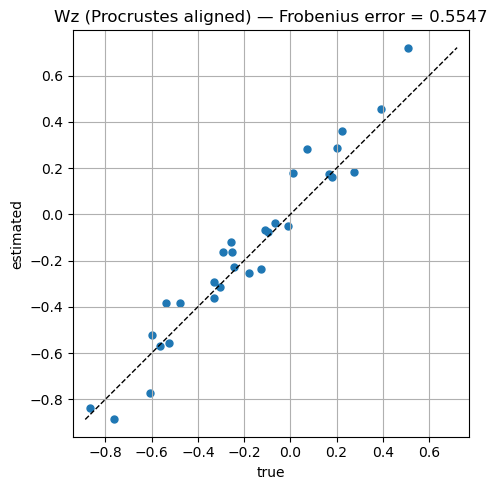

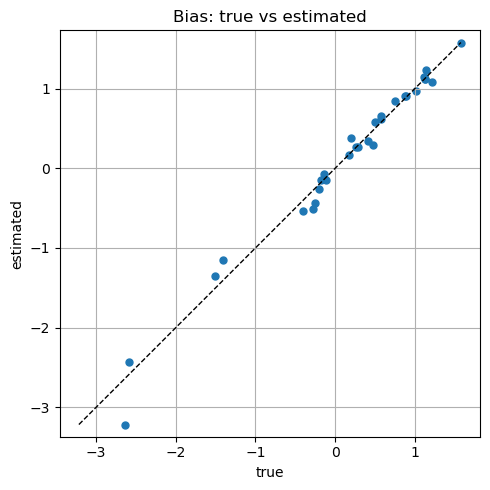

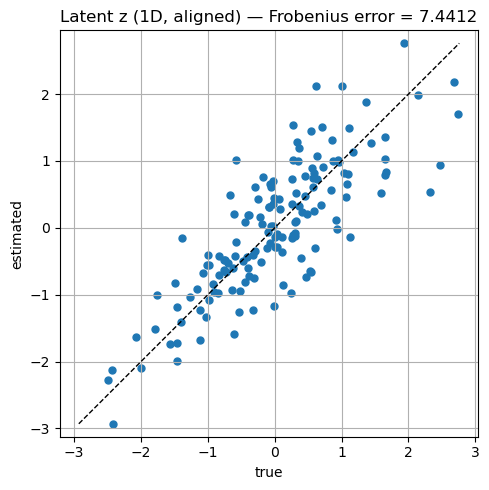

In [ ]:
import numpy as np
import random
import os
import torch
import copy
from gllvm.fitter import VAEFitter, ZQEFitter
from gllvm.encoder import Encoder, EncoderMAP, EncoderPosteriorSupervised
from gllvm.simulations import make_gaussian_only, simulate, make_poisson_only, make_mixed
from gllvm.plots import compare_wz, compare_bias, compare_z


# ----------------------------------------------------------
# Seeds
# ----------------------------------------------------------
seed = 14320
os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = "cuda" if torch.cuda.is_available() else "cpu"

# ----------------------------------------------------------
# Setup
# ----------------------------------------------------------
latent_dim = 1
gaussian = 0
poisson = 20
binomial = 10
binom_trials = 2
response_dim = gaussian + poisson + binomial
n_samples = 10000


def get_model():
    return make_mixed(
        n_latent=latent_dim,
        gaussian=gaussian,
        poisson=poisson,
        binomial=binomial,
        binom_trials=binom_trials,
    )

# ----------------------------------------------------------
# Simulate true model
# ----------------------------------------------------------
g0 = get_model()
g0.wz.data *= .5  # scale loadings
y0, z0 = simulate(g0, n_samples=n_samples, device=device)



# ----------------------------------------------------------
# VAE Fresh model + encoder
# ----------------------------------------------------------
g_VAE = get_model()
g_VAE.wz.data *= .01  # scale loadings
enc_VAE = Encoder(
    input_dim=response_dim,
    latent_dim=latent_dim
).to(device)







# ----------------------------------------------------------
# Fit model
# ----------------------------------------------------------

for i in range(5):
    epochs = 500
    if i == 4:
        # Store model to finish fitting later with ZQE without having enjoyed one more loop of VAE fitting (that would be unfair)
        g_VAE_ZQE = copy.deepcopy(g_VAE)
        epochs = 2000
    fitter = VAEFitter(g_VAE, enc_VAE, lr=1e-3, device=device)
    fitter.fit(y0, epochs=epochs, batch_size=500)




# ----------------------------------------------------------
# Plot Wz, bias, and latent Z (with Procrustes alignment)
# ----------------------------------------------------------

# --- Wz (Procrustes-aligned )
compare_wz(g0, g_VAE)

# --- Bias (simple scatter)
compare_bias(g0, g_VAE)

# --- Latent Z alignment (Procrustes inside compare_z)
with torch.no_grad():
    z_VAE, _, _ = enc_VAE.sample(y0.to(device))

compare_z(z0, z_VAE)




Epoch 1: ELBO=0.00
Epoch 2: ELBO=0.00
Epoch 3: ELBO=0.00
Epoch 4: ELBO=0.00
Epoch 5: ELBO=0.00
Epoch 6: ELBO=0.00
Epoch 7: ELBO=0.00
Epoch 8: ELBO=0.00
Epoch 9: ELBO=0.00
Epoch 10: ELBO=0.00
Epoch 11: ELBO=0.00
Epoch 12: ELBO=0.00
Epoch 13: ELBO=0.00
Epoch 14: ELBO=0.00
Epoch 15: ELBO=0.00
Epoch 16: ELBO=0.00
Epoch 17: ELBO=0.00
Epoch 18: ELBO=0.00
Epoch 19: ELBO=0.00
Epoch 20: ELBO=0.00
Epoch 21: ELBO=0.00
Epoch 22: ELBO=0.00
Epoch 23: ELBO=0.00
Epoch 24: ELBO=0.00
Epoch 25: ELBO=0.00
Epoch 26: ELBO=0.00
Epoch 27: ELBO=0.00
Epoch 28: ELBO=0.00
Epoch 29: ELBO=0.00
Epoch 30: ELBO=0.00
Epoch 31: ELBO=0.00
Epoch 32: ELBO=0.00
Epoch 33: ELBO=0.00
Epoch 34: ELBO=0.00
Epoch 35: ELBO=0.00
Epoch 36: ELBO=0.00
Epoch 37: ELBO=0.00
Epoch 38: ELBO=0.00
Epoch 39: ELBO=0.00
Epoch 40: ELBO=0.00
Epoch 41: ELBO=0.00
Epoch 42: ELBO=0.00
Epoch 43: ELBO=0.00
Epoch 44: ELBO=0.00
Epoch 45: ELBO=0.00
Epoch 46: ELBO=0.00
Epoch 47: ELBO=0.00
Epoch 48: ELBO=0.00
Epoch 49: ELBO=0.00
Epoch 50: ELBO=0.00
Epoch 51:

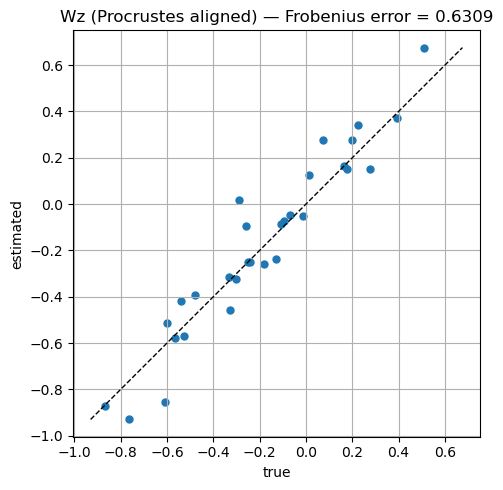

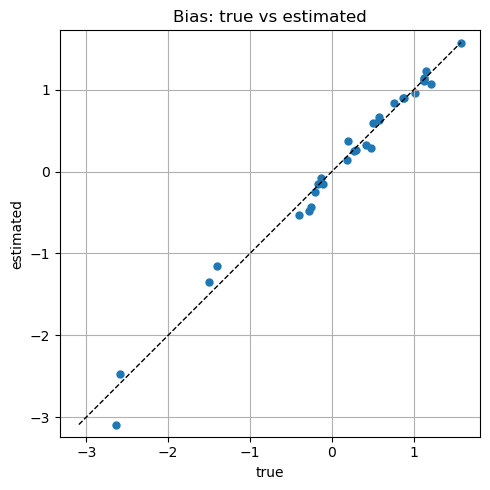

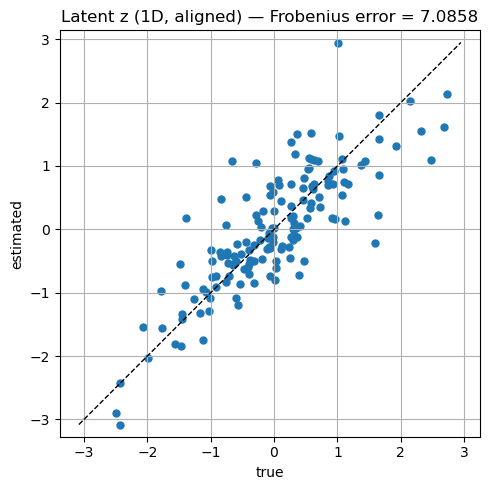

In [2]:

# ----------------------------------------------------------
# ZQE Freeze encoder + continue
# ----------------------------------------------------------

# ----------------------------------------------------------
# Fit model
# ----------------------------------------------------------

for i in range(1):

    fitter = ZQEFitter(g_VAE_ZQE, enc_VAE, lr=1e-3, device=device, fit_encoder=False)
    fitter.fit(y0, epochs=2000, batch_size=500)



# ----------------------------------------------------------
# Plot Wz, bias, and latent Z (with Procrustes alignment)
# ----------------------------------------------------------

# --- Wz (Procrustes-aligned )
compare_wz(g0, g_VAE_ZQE)

# --- Bias (simple scatter)
compare_bias(g0, g_VAE_ZQE)

# --- Latent Z alignment (Procrustes inside compare_z)
with torch.no_grad():
    z_VAE_ZQE, _, _ = enc_VAE.sample(y0.to(device))

compare_z(z0, z_VAE_ZQE)
# ----------------------------------------------------------



Epoch 1: ELBO=-77.92


Epoch 2: ELBO=-76.69
Epoch 3: ELBO=-75.44
Epoch 4: ELBO=-74.62
Epoch 5: ELBO=-73.26
Epoch 6: ELBO=-72.13
Epoch 7: ELBO=-71.07
Epoch 8: ELBO=-69.82
Epoch 9: ELBO=-68.55
Epoch 10: ELBO=-67.53
Epoch 11: ELBO=-66.43
Epoch 12: ELBO=-65.25
Epoch 13: ELBO=-64.29
Epoch 14: ELBO=-63.38
Epoch 15: ELBO=-62.43
Epoch 16: ELBO=-61.61
Epoch 17: ELBO=-60.92
Epoch 18: ELBO=-60.15
Epoch 19: ELBO=-59.47
Epoch 20: ELBO=-58.91
Epoch 21: ELBO=-58.32
Epoch 22: ELBO=-57.78
Epoch 23: ELBO=-57.35
Epoch 24: ELBO=-56.88
Epoch 25: ELBO=-56.44
Epoch 26: ELBO=-56.09
Epoch 27: ELBO=-55.73
Epoch 28: ELBO=-55.40
Epoch 29: ELBO=-55.13
Epoch 30: ELBO=-54.83
Epoch 31: ELBO=-54.56
Epoch 32: ELBO=-54.31
Epoch 33: ELBO=-54.05
Epoch 34: ELBO=-53.81
Epoch 35: ELBO=-53.58
Epoch 36: ELBO=-53.33
Epoch 37: ELBO=-53.12
Epoch 38: ELBO=-52.90
Epoch 39: ELBO=-52.70
Epoch 40: ELBO=-52.50
Epoch 41: ELBO=-52.29
Epoch 42: ELBO=-52.11
Epoch 43: ELBO=-51.93
Epoch 44: ELBO=-51.74
Epoch 45: ELBO=-51.58
Epoch 46: ELBO=-51.40
Epoch 47: ELBO=-51

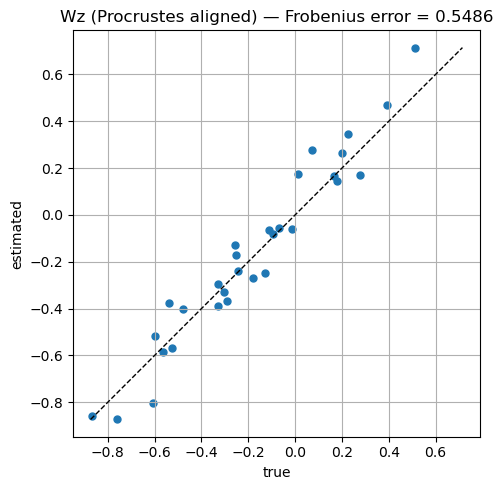

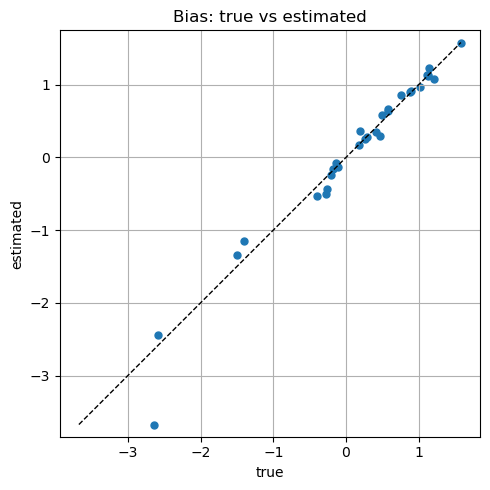

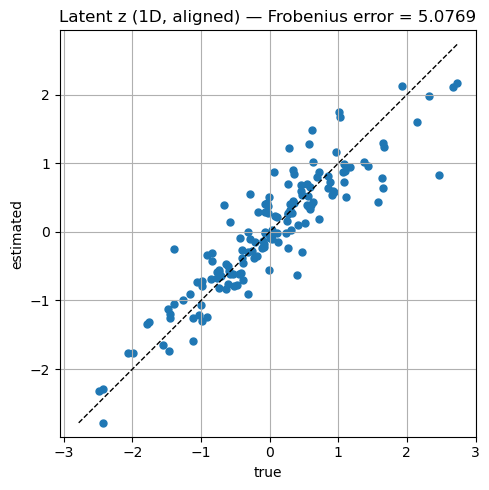

In [3]:




# ----------------------------------------------------------
# ZQE Fresh MAP model 
# ----------------------------------------------------------
with torch.no_grad():
    g_ZQE = get_model()
    g_ZQE.wz.data *= .1  # scale loadings

enc_ZQE_MAP = EncoderMAP(
    input_dim=response_dim,
    latent_dim=latent_dim
).to(device)







# ----------------------------------------------------------
# Fit model
# ----------------------------------------------------------
for i in range(5):
    if i < 4:
        lr = 1e-2
        epochs = 500
    else:
        lr = 1e-3
        epochs = 2000
    fitter = ZQEFitter(g_ZQE, enc_ZQE_MAP, lr=lr, device=device)
    fitter.fit(y0, epochs=epochs, batch_size=500)




# ----------------------------------------------------------
# Plot Wz, bias, and latent Z (with Procrustes alignment)
# ----------------------------------------------------------

# --- Wz (Procrustes-aligned )
compare_wz(g0, g_ZQE)

# --- Bias (simple scatter)
compare_bias(g0, g_ZQE)

# --- Latent Z alignment (Procrustes inside compare_z)
with torch.no_grad():
    z_ZQE_MAP, _, _ = enc_ZQE_MAP.sample(y0.to(device))

compare_z(z0, z_ZQE_MAP)





In [4]:


# # ----------------------------------------------------------
# # ZQE Fresh model + encoder  SUPERPVISEd
# # ----------------------------------------------------------
# with torch.no_grad():
#     g_ZQE = get_model()
#     g_ZQE.wz.data *= .01  # scale loadings

# enc_ZQE_SUP = EncoderPosteriorSupervised(
#     input_dim=response_dim,
#     latent_dim=latent_dim
# ).to(device)



# # ----------------------------------------------------------
# # Fit model
# # ----------------------------------------------------------
# for i in range(4):
#     fitter = ZQEFitter(g_ZQE, enc_ZQE_SUP, lr=1e-3, device=device)
#     fitter.fit(y0, epochs=500, batch_size=5000)



# # ----------------------------------------------------------
# # Plot Wz, bias, and latent Z (with Procrustes alignment)
# # ----------------------------------------------------------

# # --- Wz (Procrustes-aligned )
# compare_wz(g0, g_ZQE)

# # --- Bias (simple scatter)
# compare_bias(g0, g_ZQE)

# # --- Latent Z alignment (Procrustes inside compare_z)
# with torch.no_grad():
#     z_ZQE_SUP, _, _ = enc_ZQE_SUP.sample(y0.to(device))
    

# compare_z(z0, z_ZQE_SUP)